# Python Example for STM32F103 MCU

In [ ]:
import ctypes
import sys

[STM32F10X_HD_StdPeriph_Lib.py](remcu_include/STM32F10X_HD_StdPeriph_Lib.py) is a Python wrapper that containing all necessary constants and structures which makes it possible to use the Standard Peripheral Library function just like with C and C++ code.

In [ ]:
from remcu_include.STM32F10X_HD_StdPeriph_Lib import *

Loading the REMCU library

In [ ]:
if sys.platform.startswith('win32'): #Windows
    remcu = ctypes.WinDLL("remcu.dll")
elif sys.platform.startswith('cygwin'): #Windows/Cygwin
    remcu = ctypes.WinDLL("remcu.dll")
elif sys.platform.startswith('linux'):  #Linux OS
    remcu = ctypes.CDLL("./libremcu.so")
elif sys.platform.startswith('darwin'): #MacOS
    remcu = ctypes.CDLL("./libremcu.dylib")

Connection to a debug server. The [REMCU](https://remotemcu.com/) library is able to work with [OpenOCD](https://github.com/ilg-archived/openocd/releases/tag/v0.10.0-12-20190422) or [GDB server](https://atollic.com/resources/download/). There is using the ***remcu_connect2OpenOCD***(see [“remcu.h”](remcu_include/remcu.h) or [API reference](https://remotemcu.com/api-v1-0)) function for connecting to the OpenOcd server. The functions have the same set of parameters. The first parameter is an IP address of the debug server. The second one is a port of the debug server. For instance, OpenOCD server print the port in log messages. The third parameter is a connection timeout. Upon a successful connection, the function returns the “true” value, otherwise, it returns “false”.

> Detailed description of other REMCU function you see in [“remcu.h”](remcu_include/remcu.h) or [API reference](https://remotemcu.com/api-v1-0)

Before that, plug stm32 board with debugger to PC
![Image](img/connection.png)
run openocd utility in command line:
```
openocd.exe -f interface/stlink-v2.cfg -f target/stm32f1x.cfg
```
Result:
![Image](img/openocd.png)

In [ ]:
debug_server_ip = "127.0.0.1"
default_openocd_port = 6666
timeout_sec = 3 # It can not be negative

success = remcu.remcu_connect2OpenOCD(debug_server_ip, default_openocd_port, timeout_sec)
if success == 0:
    print("Server error. Possible solutions: ")
    print("1. Check connection to debug server")
    print("2. Check debug server running")
    print("3. Run the script using Python2")
    exit()

If you use GDB server (either OpenOCD or ST-Link GDB server or Jlink GDB server etc.), you uncomment code below and run it:
<details>
  <summary> Jlink windows. Where the port is written <b> (click here)</b></summary>
 
<img src="https://raw.githubusercontent.com/remotemcu/remcu_examples/master/wiki/img/jlink.png" >
<img src="https://raw.githubusercontent.com/remotemcu/remcu_examples/master/wiki/img/jlink2.png" >
</details>  
<details>
  <summary> ST link GDB windows. Where the port is written<b> (click here)</b></summary>

<img src="https://raw.githubusercontent.com/remotemcu/remcu_examples/master/wiki/img/run-stling-gdb.png">
</details>

In [ ]:
#default_openocd_gdb_port = 3333
#default_jlink_port = 2331
#default_stlink_port = 61234
#custom_port = ...
#remcu.remcu_connect2GDB(debug_server_ip, default_openocd_gdb_port /*default_jlink_port*/ /*default_stlink_port*/, timeout_sec)

If connection were failed and the function returned false. See [Issue](https://github.com/remotemcu/remcu_examples/issues) and [Troubleshooting Page](https://remotemcu.com/troubleshooting-page) 

If connection were success... Jupyter Output:
![Image](img/success_connection.png)

Reset the MCU (see [“remcu.h”](remcu_include/remcu.h) or [API reference](https://remotemcu.com/api-v1-0)):

In [ ]:
remcu.remcu_resetRemoteUnit(1);

At this stage the microcontroller clock setting is already configured, this is done through SystemInit() function which is called from startup file (startup_stm32f10x.s) before to branch to application main. To see the default setting of SystemInit() function, refer to remcu_include/system_stm32f10x.c file

In [ ]:
remcu.SystemInit();

### GPIO Example
>The code below have been taken from **IO_Toggle** ([main.c](STM32F10x_StdPeriph_Lib_V3.5.0/Project/STM32F10x_StdPeriph_Examples/GPIO/IOToggle/main.c)) example of [Standard Peripheral Library(SPL) for STM32F10x line](https://www.st.com/content/st_com/en/products/embedded-software/mcu-mpu-embedded-software/stm32-embedded-software/stm32-standard-peripheral-libraries/stsw-stm32054.html)

GPIOD Periph clock enable:

In [ ]:
remcu.RCC_APB2PeriphClockCmd(RCC_APB2Periph_GPIOB, ENABLE);

Configure PB12 in output pushpull mode:

In [ ]:
GPIO_InitStructure = GPIO_InitTypeDef()
GPIO_InitStructure.GPIO_Pin = GPIO_Pin_12
GPIO_InitStructure.GPIO_Speed = GPIO_Speed_10MHz
GPIO_InitStructure.GPIO_Mode = GPIO_Mode_Out_PP
remcu.GPIO_Init(GPIOB, GPIO_InitStructure.ref());

Flash led on:

In [ ]:
remcu.GPIO_SetBits(GPIOB,GPIO_Pin_12);

Flash led off:

In [ ]:
remcu.GPIO_ResetBits(GPIOB, GPIO_Pin_12);

If it didn’t happen, you can use the utility functions to detect errors...

### Utility Functions

The ***remcu_getErrorCount***(see [“remcu.h”](remcu_include/remcu.h) or [API reference](https://remotemcu.com/api-v1-0)) function returns the number of errors that occurred after connection.

In [ ]:
remcu.remcu_getErrorCount()

If no error occurred, result **0**, otherwise see [Issue](https://github.com/remotemcu/remcu_examples/issues) and [Troubleshooting Page](https://remotemcu.com/troubleshooting-page)

The ***remcu_isConnected***(see [“remcu.h”](remcu_include/remcu.h) or [API reference](https://remotemcu.com/api-v1-0)) function indicates status of the current debug server connection.

In [ ]:
remcu.remcu_isConnected()

Result: connected ***1*** , disconnected ***0***

Some of debug adapters can have hardware problems. The ***remcu_debuggerTest***(see [“remcu.h”](remcu_include/remcu.h) or [API reference](https://remotemcu.com/api-v1-0)) function enables to detect such adapters. The function returns a null pointer if the test is successful.

In [ ]:
remcu.remcu_debuggerTest()

If no error occurred, result **0**, otherwise see [Issue](https://github.com/remotemcu/remcu_examples/issues) and [Troubleshooting Page](https://remotemcu.com/troubleshooting-page)

>If bugs are not discovered and the chip don't responds to driver function call or the result of work was not what you expected, see [Issue](https://github.com/remotemcu/remcu_examples/issues) and [Troubleshooting Page](https://remotemcu.com/troubleshooting-page)

### ADC example
>The code below is based on **AnalogWatchdog** ([main.c](STM32F10x_StdPeriph_Lib_V3.5.0/Project/STM32F10x_StdPeriph_Examples/ADC/AnalogWatchdog/main.c)) example of [Standard Peripheral Library(SPL) for STM32F10x line](https://www.st.com/content/st_com/en/products/embedded-software/mcu-mpu-embedded-software/stm32-embedded-software/stm32-standard-peripheral-libraries/stsw-stm32054.html)

In [ ]:
#clock for ADC:
remcu.RCC_ADCCLKConfig(RCC_PCLK2_Div4);

#GPIOC Periph clock enable:
remcu.RCC_APB2PeriphClockCmd(RCC_APB2Periph_GPIOC, ENABLE)

#enable ADC system clock:
remcu.RCC_APB2PeriphClockCmd(RCC_APB2Periph_ADC1, ENABLE)

GPIO_InitStructure = GPIO_InitTypeDef()

remcu.RCC_APB2PeriphClockCmd(RCC_APB2Periph_GPIOB | RCC_APB2Periph_GPIOA, ENABLE)
GPIO_InitStructure.GPIO_Pin = GPIO_Pin_0
GPIO_InitStructure.GPIO_Speed = GPIO_Speed_10MHz
GPIO_InitStructure.GPIO_Mode = GPIO_Mode_Out_PP
remcu.GPIO_Init(GPIOB, GPIO_InitStructure.ref())
remcu.GPIO_SetBits(GPIOB, GPIO_Pin_0)

GPIO_InitStructure.GPIO_Pin = GPIO_Pin_6
GPIO_InitStructure.GPIO_Speed = GPIO_Speed_10MHz
GPIO_InitStructure.GPIO_Mode = GPIO_Mode_Out_PP
remcu.GPIO_Init(GPIOA, GPIO_InitStructure.ref())
remcu.GPIO_ResetBits(GPIOA, GPIO_Pin_6)

#/* Configure PC.04 (ADC Channel14) as analog input -------------------------*/
GPIO_InitStructure.GPIO_Pin = GPIO_Pin_4
GPIO_InitStructure.GPIO_Mode = GPIO_Mode_AIN
remcu.GPIO_Init(GPIOC, GPIO_InitStructure.ref())

#define ADC base config:

ADC_InitStructure = ADC_InitTypeDef()
#/* ADC1 configuration ------------------------------------------------------*/
ADC_InitStructure.ADC_Mode = ADC_Mode_Independent;
ADC_InitStructure.ADC_ScanConvMode = DISABLE;
ADC_InitStructure.ADC_ContinuousConvMode = DISABLE;
ADC_InitStructure.ADC_ExternalTrigConv = ADC_ExternalTrigConv_None;
ADC_InitStructure.ADC_DataAlign = ADC_DataAlign_Right;
ADC_InitStructure.ADC_NbrOfChannel = 1;
remcu.ADC_Init(ADC1,  ADC_InitStructure.ref());

#/* ADC1 regular channel14 configuration */ 
remcu.ADC_RegularChannelConfig(ADC1, ADC_Channel_14, 1, ADC_SampleTime_55Cycles5);

#/* Enable ADC1 */
remcu.ADC_Cmd(ADC1, ENABLE);

#/* Enable ADC1 reset calibration register */   
remcu.ADC_ResetCalibration(ADC1);
#/* Check the end of ADC1 reset calibration register */
while remcu.ADC_GetResetCalibrationStatus(ADC1) != 0: pass

#/* Start ADC1 calibration */
remcu.ADC_StartCalibration(ADC1);
#/* Check the end of ADC1 calibration */
while remcu.ADC_GetCalibrationStatus(ADC1) != 0: pass

#/* Start ADC1 Software Conversion */ 
remcu.ADC_SoftwareStartConvCmd(ADC1, ENABLE)

Start conversion and read ADC value:

In [ ]:
def ADC_value():
    #// start conversion (will be endless as we are in continuous mode)
    remcu.ADC_SoftwareStartConvCmd(ADC1, ENABLE)
    return remcu.ADC_GetConversionValue(ADC1)

ADC_value()

Plug a potentiometer into the PC4 pin and run the code below.
Rotate the shaft and you will get the voltage versus time chart:
>First install [matplotlib](https://github.com/matplotlib/jupyter-matplotlib) or make sure you have it

Result: 


<IPython.core.display.Javascript object>


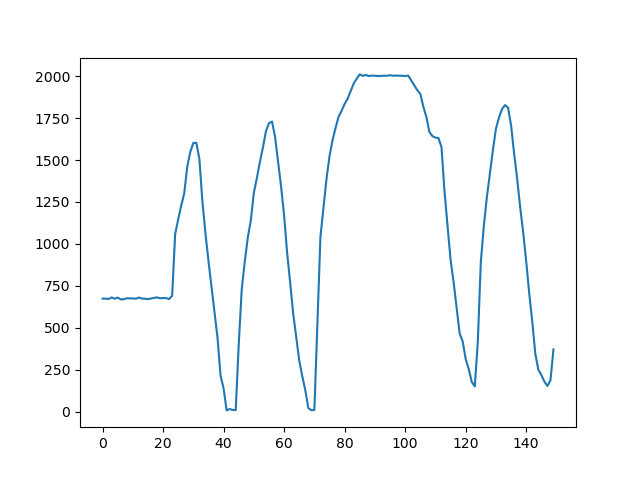

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt

print("Result: ")

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

ADC = []
for i in range(0,150):
    ADC.append(ADC_value())
    ax.clear()
    ax.plot(ADC)
    fig.canvas.draw()

Finalizing work with REMCU Library:

In [ ]:
remcu.remcu_disconnect()